In [37]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm


In [38]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

In [39]:
import scienceplots
plt.style.use('science')

In [40]:
merger_file_path='/home/pranavsatheesh/host_galaxies/data/merger_files'
minN_values = [0,0,1000,1]
merger_file_1bh = merger_file_path + f'/galaxy-mergers_TNG50-1_gas-{minN_values[0]:03d}_dm-{minN_values[1]:03d}_star-{minN_values[2]:03d}_bh-{minN_values[3]:03d}.hdf5'
fmergers_TNG50 = h5py.File(merger_file_1bh, 'r')
fmergers_TNG50.attrs['HubbleParam']

0.6774

In [41]:
basePath ='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/SM5_TNG/'
merger_file_path='/home/pranavsatheesh/host_galaxies/data/merger_files'
minN_values = [0,0,10,1]
merger_file_name = f'/galaxy-mergers_brahma_{basePath.split("/")[-2]}_gas-{minN_values[0]:03d}_dm-{minN_values[1]:03d}_star-{minN_values[2]:03d}_bh-{minN_values[3]:03d}.hdf5'
merger_file_loc='/home/pranavsatheesh/host_galaxies/data/merger_files'
merger_file_path = merger_file_loc + merger_file_name
fmergers_brahma = h5py.File(merger_file_path, 'r')

In [42]:
fmergers_brahma

<HDF5 file "galaxy-mergers_brahma_SM5_TNG_gas-000_dm-000_star-010_bh-001.hdf5" (mode r)>

In [43]:
print(list(fmergers_TNG50.attrs))

['HubbleParam', 'Omega0', 'OmegaLambda', 'box_volume_mpc', 'created', 'merger_components_in_data_arrays', 'min_parts', 'num_mergers', 'part_names', 'part_types', 'snaptimes']


In [44]:
fmergers_brahma.attrs['box_volume_mpc']**(1/3) * 1000

18461.08403485452

In [45]:
fmergers_brahma.keys()

<KeysViewHDF5 ['ProgMassRatio', 'SubhaloLenType', 'fpMass', 'npMass', 'shids_subf', 'shids_tree', 'snaps']>

In [46]:
subhaloidx_prog1 = fmergers["shids_subf"][:,0]
subhaloidx_prog2 = fmergers["shids_subf"][:,1]
subhaloidx_desc = fmergers["shids_subf"][:,2]

In [47]:
z_prog1 = 1/(fmergers['time'][:,0])-1
z_prog2 = 1/(fmergers['time'][:,1])-1
z_desc = 1/(fmergers['time'][:,2])-1

In [48]:
snaps_galaxy_prog1 = fmergers["snaps"][:,0]
snaps_galaxy_prog2 = fmergers["snaps"][:,1]
snaps_galaxy_desc = fmergers["snaps"][:,2]

In [49]:
prog1_gas_mass_array = np.zeros_like(subhaloidx_prog1,dtype=float)
prog1_stellar_mass_array = np.zeros_like(subhaloidx_prog1,dtype=float)

prog2_gas_mass_array = np.zeros_like(subhaloidx_prog2,dtype=float)
prog2_stellar_mass_array = np.zeros_like(subhaloidx_prog2,dtype=float)

In [50]:
unique_prog_snaps = np.unique(np.concatenate([snaps_galaxy_prog1, snaps_galaxy_prog2]))

In [51]:
base_path = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'

In [52]:
subhalos = il.groupcat.loadSubhalos(
        base_path,snaps_galaxy_prog1[0], 
        fields=['SubhaloMassInRadType','SubhaloMassType']
    )

In [62]:
fields=['SubhaloMassInRadType','SubhaloMassType','SubhaloLenType']
basePath ='/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/SM5_TNG/'
minN_values = [0,0,10,1]
merger_file_name = f'/galaxy-mergers_brahma_{basePath.split("/")[-2]}_gas-{minN_values[0]:03d}_dm-{minN_values[1]:03d}_star-{minN_values[2]:03d}_bh-{minN_values[3]:03d}.hdf5'
merger_file_loc='/home/pranavsatheesh/host_galaxies/data/merger_files'
merger_file_path = merger_file_loc + merger_file_name
fmergers_brahma = h5py.File(merger_file_path, 'r')

In [66]:
np.unique(fmergers_brahma['snaps'][:,2])

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [71]:
np.where(fmergers_brahma['snaps'][:,2] == 17)[0]

array([102, 161, 457, 495])

In [67]:
import arepo_package as arepo

In [68]:
brahma_snapshots,brahma_redshifts = arepo.get_snapshot_redshift_correspondence(basePath)

In [72]:
brahma_redshifts[np.where(brahma_snapshots==32)[0][0]]

2.220446049250313e-16

In [86]:
subhalos = il_brahma.groupcat.loadSubhalos_postprocessed(basePath,6,fields)
Ngas = subhalos['SubhaloLenType'][:, 0]
Ndm = subhalos['SubhaloLenType'][:, 1]
Nstar = subhalos['SubhaloLenType'][:, 2]
Nbh = subhalos['SubhaloLenType'][:, 5]
subhalo_ids = np.arange(len(Ngas))
print(len(subhalo_ids))

499


In [87]:
Nstar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
prog1_indices_in_this_snap = np.where(snaps_galaxy_prog1==snaps_galaxy_prog1[0])[0]

In [ ]:
for i, snap in enumerate(unique_prog_snaps):
    subhalos = il.groupcat.loadSubhalos(
        base_path, snap, 
        fields=['SubhaloMassInRadType']
    )

    subhalo_ids = np.arange(len(subhalos['SubhaloMassInRadType'][:,0]))

    prog1_indices = np.where(snaps_galaxy_prog1==snap)[0]
    prog2_indices = np.where(snaps_galaxy_prog2==snap)[0]

    prog1_subhaloidx = subhaloidx_prog1[prog1_indices]
    prog2_subhaloidx = subhaloidx_prog2[prog2_indices]

    subhalos['SubhaloMassInRadType'] *= 1e10 / 0.6774  # Convert to Msun/h

    prog1_gas_mass_array[prog1_subhaloidx] = subhalos['SubhaloMassInRadType'][prog1_subhaloidx, 0]
    prog1_stellar_mass_array[prog1_subhaloidx] = subhalos['SubhaloMassInRadType'][prog1_subhaloidx, 1]



In [92]:
used = np.zeros(len(non_merging_pop_Mstar),dtype=bool)
merger_control_index_pairs = []

for z_i in tqdm(all_mrgr_z,"processing all unique merger redshifts"):

    zi_merger_ix = np.where(pop['merging_population']['z']==z_i)[0]
    zi_nonmrgr_ix = np.where(pop['non_merging_population']['z']==z_i)[0]
    zi_nonmerger_ix = zi_nonmrgr_ix[used[zi_nonmrgr_ix]==False]

    merger_Mstars=pop['merging_population']['Mstar'][zi_merger_ix]
    nonmerger_Mstars=pop['non_merging_population']['Mstar'][zi_nonmerger_ix]

    for Mstar_merger_i in merger_Mstars:
        closest_non_merger_ix = np.argmin(np.abs(nonmerger_Mstars - Mstar_merger_i))
        mass_diff = np.abs(np.log(nonmerger_Mstars[closest_non_merger_ix]) - np.log(Mstar_merger_i))

        if mass_diff < 0.1:
            #print(mass_diff,np.log10(Mstar_merger_i),np.log10(nonmerger_Mstars[closest_non_merger_ix]))

            merger_index = np.where(merging_pop_Mstar==Mstar_merger_i)[0][0]
            non_merger_index = np.where(non_merging_pop_Mstar==nonmerger_Mstars[closest_non_merger_ix])[0][0]
            merger_control_index_pairs.append((merger_index,non_merger_index))
            used[non_merger_index] = True
        else:
            merger_control_index_pairs.append((merger_index,-1))

processing all unique merger redshifts:   0%|          | 0/80 [00:00<?, ?it/s]

processing all unique merger redshifts: 100%|██████████| 80/80 [00:00<00:00, 393.27it/s]


In [93]:
print("Number of cases where a close enough match is not found wit" \
"hin the acceptable tolerance:",len(np.argwhere(np.array(merger_control_index_pairs)[:,1] == -1)))


Number of cases where a close enough match is not found within the acceptable tolerance: 28


In [ ]:
merger_control_index_pairs = np.array(merger_control_index_pairs)

In [169]:
MBH_not_zero_flag = pop['merging_population']['MBH'][:][merger_control_index_pairs[:,0]]!=0
control_available_flag = merger_control_index_pairs[:,1]!=-1
valid_control_available_flag  = MBH_not_zero_flag&control_available_flag
# valid_control_available_flag = MBH_not_zero_flag & control_available_flag

In [170]:
np.sum(pop['merging_population']['MBH'][:][merger_control_index_pairs[valid_control_available_flag,0]]==0)

0

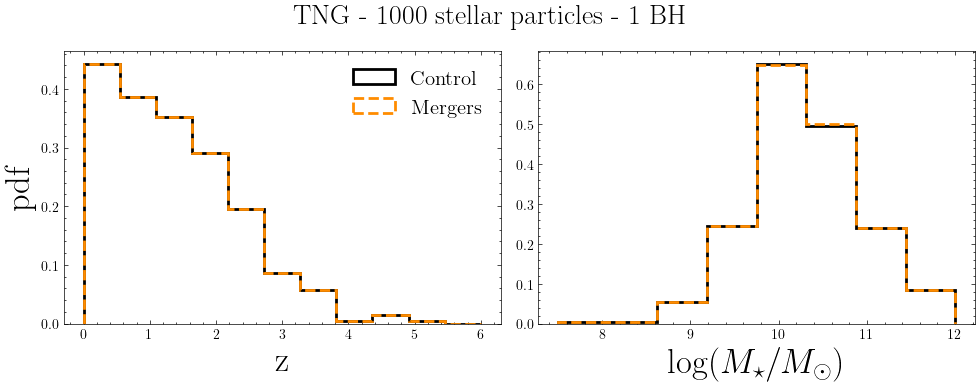

In [172]:
Mstar_binsize = 0.5
Mstar_min = 7.5
Mstar_max = 12
Nbins_Ms = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Ms)

z_binsize = 0.5
z_min = 0
z_max = 6
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z )

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(pop['non_merging_population']['z'][:][merger_control_index_pairs[:,1]][valid_control_available_flag], bins=z_bins, color="black", histtype="step",linewidth=2,density=True,label="Control")
ax[0].set_xlabel("z",fontsize=25)
ax[0].hist(pop['merging_population']['z'][:][merger_control_index_pairs[:,0]][valid_control_available_flag], bins=z_bins, histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True,label="Mergers")
ax[0].set_ylabel("pdf",fontsize=25)
ax[0].legend(fontsize=15)
#ax[0].set_xticks([0,1,2,3,4,5])

ax[1].hist(np.log10(pop['non_merging_population']['Mstar'][:][merger_control_index_pairs[:,1]][valid_control_available_flag]), bins=Mstar_bins,histtype="step",color="black",label="Control",linewidth=2,density=True)
ax[1].set_xticks([7,8,9,10,11,12])
ax[1].hist(np.log10(pop['merging_population']['Mstar'][:][merger_control_index_pairs[:,0]][valid_control_available_flag]),bins=Mstar_bins,histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True,label="Mergers")
ax[1].set_xlabel("$\log(M_{\star}/M_{\odot})$",fontsize=25)

fig.suptitle("TNG - 1000 stellar particles - 1 BH",fontsize=20)
fig.tight_layout()

In [173]:
z_merging_pop = pop['merging_population']['z'][:][merger_control_index_pairs[valid_control_available_flag,0]]
z_control_pop = pop['non_merging_population']['z'][:][merger_control_index_pairs[valid_control_available_flag,1]]

Mstar_merging_pop = pop['merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,0]]
Mstar_control_pop = pop['non_merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,1]]

SFR_merging_pop = pop['merging_population']['SFR'][:][merger_control_index_pairs[valid_control_available_flag,0]]
SFR_control_pop = pop['non_merging_population']['SFR'][:][merger_control_index_pairs[valid_control_available_flag,1]]

sSFR_merging_pop = SFR_merging_pop/Mstar_merging_pop
sSFR_control_pop = SFR_control_pop/Mstar_control_pop

MBH_dot_merging_pop = pop['merging_population']['Mdot'][:][merger_control_index_pairs[valid_control_available_flag,0]]
MBH_dot_control_pop = pop['non_merging_population']['Mdot'][:][merger_control_index_pairs[valid_control_available_flag,1]]

MBH_merging_pop = pop['merging_population']['MBH'][:][merger_control_index_pairs[valid_control_available_flag,0]]
MBH_control_pop = pop['non_merging_population']['MBH'][:][merger_control_index_pairs[valid_control_available_flag,1]]

sBHAR_merging_pop = MBH_dot_merging_pop/MBH_merging_pop
sBHAR_control_pop = MBH_dot_control_pop/MBH_control_pop

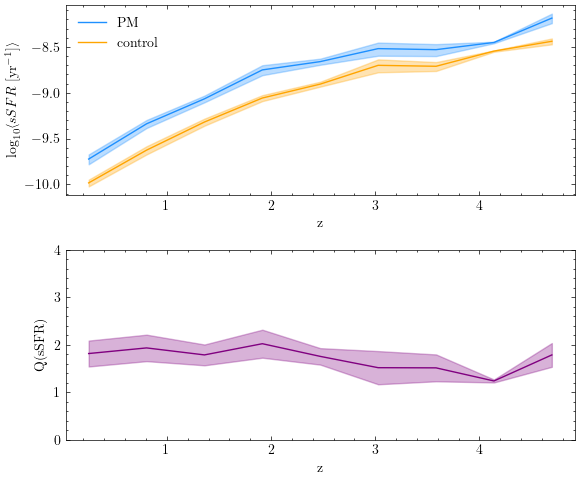

In [174]:
z_min = 0
z_max = 5
z_binsize = 0.5

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sSFR_control = []
std_sSFR_control = []

avg_sSFR_merger = []
std_sSFR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sSFR_merging_pop_filtered = sSFR_merging_pop[merger_z_mask]
    sSFR_control_pop_filtered = sSFR_control_pop[control_z_mask]

    avg_sSFR_merger.append(np.mean(sSFR_merging_pop_filtered))
    std_sSFR_merger.append(np.std(sSFR_merging_pop_filtered) / np.sqrt(len(sSFR_merging_pop_filtered)))

    avg_sSFR_control.append(np.mean(sSFR_control_pop_filtered))
    std_sSFR_control.append(np.std(sSFR_control_pop_filtered) / np.sqrt(len(sSFR_control_pop_filtered)))

avg_sSFR_merger = np.array(avg_sSFR_merger)
std_sSFR_merger = np.array(std_sSFR_merger)

avg_sSFR_control = np.array(avg_sSFR_control)
std_sSFR_control = np.array(std_sSFR_control)

Q_sSFR = avg_sSFR_merger / avg_sSFR_control
Q_sSFR_SE = Q_sSFR * np.sqrt((std_sSFR_merger / avg_sSFR_merger) ** 2 + (std_sSFR_control / avg_sSFR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger[avg_sSFR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger - std_sSFR_merger), np.log10(avg_sSFR_merger + std_sSFR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control[avg_sSFR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control - std_sSFR_control), np.log10(avg_sSFR_control + std_sSFR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sSFR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sSFR - Q_sSFR_SE, Q_sSFR + Q_sSFR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sSFR)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()

(0.0, 4.0)

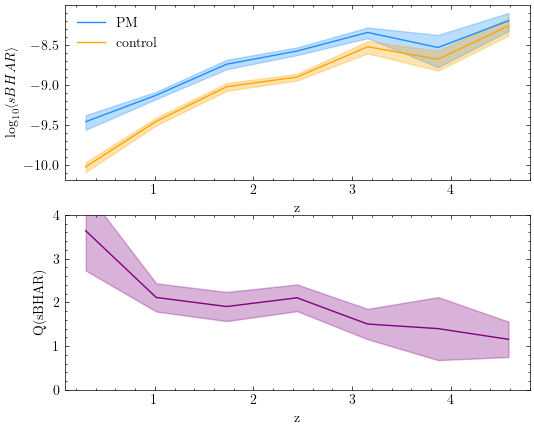

In [177]:
z_min = 0
z_max = 5
z_binsize = 0.6

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sBHAR_control = []
std_sBHAR_control = []

avg_sBHAR_merger = []
std_sBHAR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sBHAR_merging_pop_filtered = sBHAR_merging_pop[merger_z_mask]
    sBHAR_control_pop_filtered = sBHAR_control_pop[control_z_mask]

    avg_sBHAR_merger.append(np.mean(sBHAR_merging_pop_filtered))
    std_sBHAR_merger.append(np.std(sBHAR_merging_pop_filtered) / np.sqrt(len(sBHAR_merging_pop_filtered)))

    avg_sBHAR_control.append(np.mean(sBHAR_control_pop_filtered))
    std_sBHAR_control.append(np.std(sBHAR_control_pop_filtered) / np.sqrt(len(sBHAR_control_pop_filtered)))

avg_sBHAR_merger = np.array(avg_sBHAR_merger)
std_sBHAR_merger = np.array(std_sBHAR_merger)

avg_sBHAR_control = np.array(avg_sBHAR_control)
std_sBHAR_control = np.array(std_sBHAR_control)

Q_sBHAR = avg_sBHAR_merger / avg_sBHAR_control
Q_sBHAR_SE = Q_sBHAR * np.sqrt((std_sBHAR_merger / avg_sBHAR_merger) ** 2 + (std_sBHAR_control / avg_sBHAR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_merger[avg_sBHAR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_merger - std_sBHAR_merger), np.log10(avg_sBHAR_merger + std_sBHAR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_control[avg_sBHAR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_control - std_sBHAR_control), np.log10(avg_sBHAR_control + std_sBHAR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sBHAR \rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sBHAR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sBHAR - Q_sBHAR_SE, Q_sBHAR + Q_sBHAR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sBHAR)')
ax[1].set_ylim(0, 4)

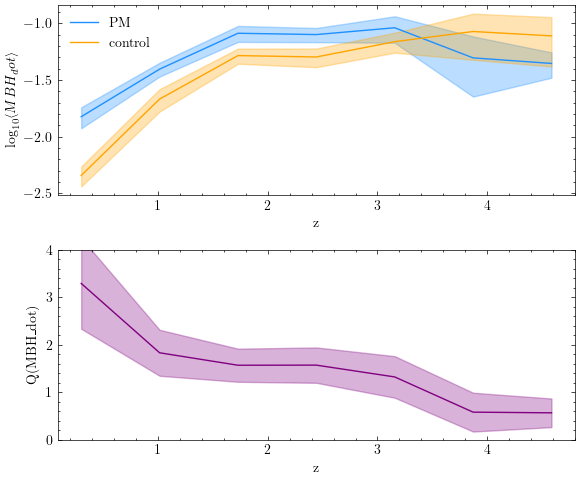

In [176]:
z_min = 0
z_max = 5
z_binsize = 0.6

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_MBH_dot_control = []
std_MBH_dot_control = []

avg_MBH_dot_merger = []
std_MBH_dot_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    MBH_dot_merging_pop_filtered = MBH_dot_merging_pop[merger_z_mask]
    MBH_dot_control_pop_filtered = MBH_dot_control_pop[control_z_mask]

    avg_MBH_dot_merger.append(np.mean(MBH_dot_merging_pop_filtered))
    std_MBH_dot_merger.append(np.std(MBH_dot_merging_pop_filtered) / np.sqrt(len(MBH_dot_merging_pop_filtered)))

    avg_MBH_dot_control.append(np.mean(MBH_dot_control_pop_filtered))
    std_MBH_dot_control.append(np.std(MBH_dot_control_pop_filtered) / np.sqrt(len(MBH_dot_control_pop_filtered)))

avg_MBH_dot_merger = np.array(avg_MBH_dot_merger)
std_MBH_dot_merger = np.array(std_MBH_dot_merger)

avg_MBH_dot_control = np.array(avg_MBH_dot_control)
std_MBH_dot_control = np.array(std_MBH_dot_control)

Q_MBH_dot = avg_MBH_dot_merger / avg_MBH_dot_control
Q_MBH_dot_SE = Q_MBH_dot * np.sqrt((std_MBH_dot_merger / avg_MBH_dot_merger) ** 2 + (std_MBH_dot_control / avg_MBH_dot_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_MBH_dot_merger[avg_MBH_dot_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_MBH_dot_merger - std_MBH_dot_merger), np.log10(avg_MBH_dot_merger + std_MBH_dot_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_MBH_dot_control[avg_MBH_dot_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_MBH_dot_control - std_MBH_dot_control), np.log10(avg_MBH_dot_control + std_MBH_dot_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle MBH_dot \rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_MBH_dot, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_MBH_dot - Q_MBH_dot_SE, Q_MBH_dot + Q_MBH_dot_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(MBH_dot)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()

In [35]:
control_file_loc = "/home/pranavsatheesh/host_galaxies/data/control_files/new/"
control_name = "TNG-50-1000-stellar-particles"
controlpop = control.control_samples(pop,control_file_loc,control_name)

The average sSFR for merging galaxies is 1.268e-09
The average sSFR for non-merging galaxies is 8.935e-10
The sSFR enhancement in post mergers is 1.420
The average Mgas for merging galaxies is 1.113e+11
The average Mgas for non-merging galaxies is 5.883e+10
The Mgas enhancement in post mergers is 1.892
The average fgas for merging galaxies is 8.377e-01
The average fgas for non-merging galaxies is 6.975e-01
The fgas enhancement in post mergers is 1.201
The average Mdot for merging galaxies is 2.269e-02
The average Mdot for non-merging galaxies is 1.323e-02
The Mdot enhancement in post mergers is 1.716


In [36]:
Nmergers = np.size(controlpop.MBH_merging_pop)
print(Nmergers)

2172


### Check the control vs mergers match 

In [ ]:
len(dSFR_dex)

437

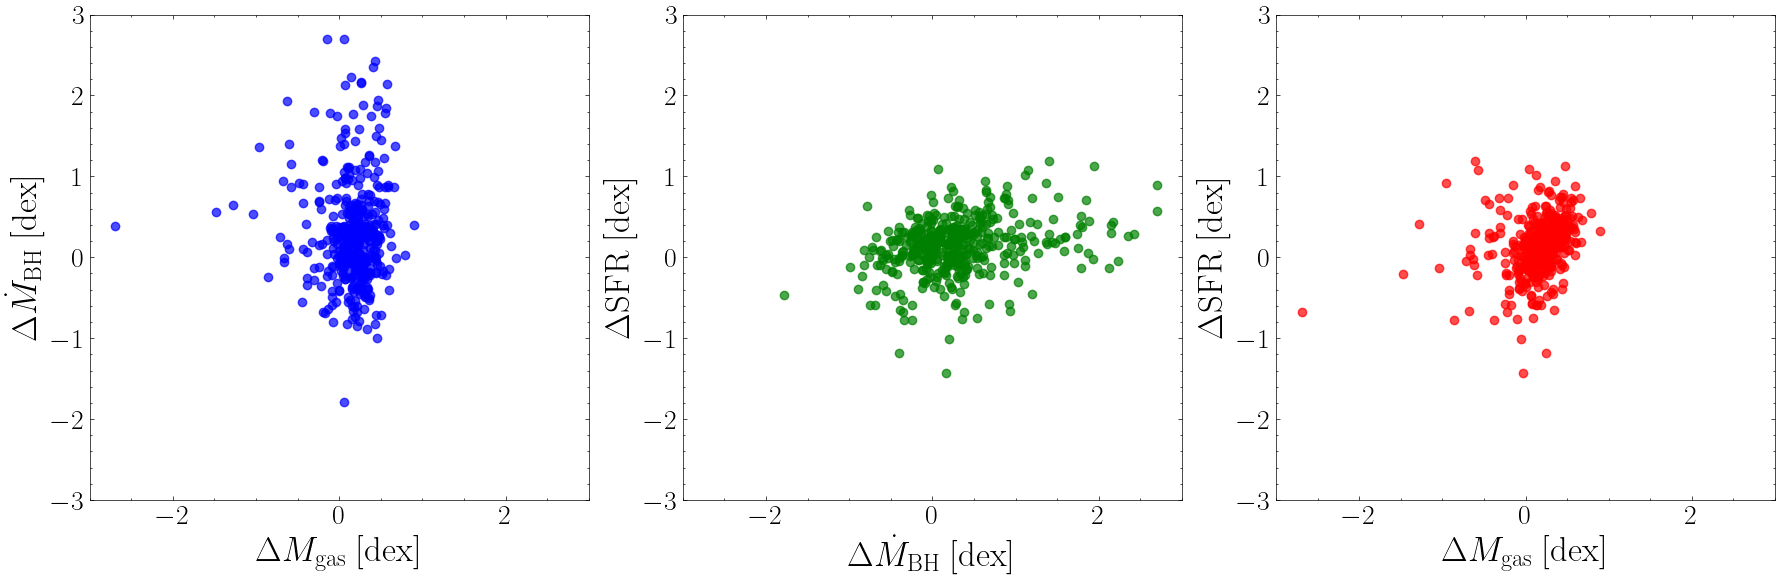

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot: DMdot_dex vs dMgas_dex
axes[0].scatter(DMgas_dex,DMdot_dex, alpha=0.7, color='blue')
axes[0].set_ylabel(r'$\Delta \dot{M}_{\mathrm{BH}} \; [\mathrm{dex}]$')
axes[0].set_xlabel(r'$\Delta M_{\mathrm{gas}} \; [\mathrm{dex}]$')
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)

# Scatter plot: DMdot_dex vs dSFR_dex
axes[1].scatter(DMdot_dex, dSFR_dex, alpha=0.7, color='green')
axes[1].set_xlabel(r'$\Delta \dot{M}_{\mathrm{BH}} \; [\mathrm{dex}]$')
axes[1].set_ylabel(r'$\Delta \mathrm{SFR} \; [\mathrm{dex}]$')
axes[1].set_xlim(-3, 3)
axes[1].set_ylim(-3, 3)


# Scatter plot: dMgas_dex vs dSFR_dex
axes[2].scatter(DMgas_dex, dSFR_dex, alpha=0.7, color='red')
axes[2].set_xlabel(r'$\Delta M_{\mathrm{gas}} \; [\mathrm{dex}]$')
axes[2].set_ylabel(r'$\Delta \mathrm{SFR} \; [\mathrm{dex}]$')
axes[2].set_xlim(-3, 3)
axes[2].set_ylim(-3, 3)

# Adjust layout
plt.tight_layout()
plt.show()